<a href="https://colab.research.google.com/github/hktimmana/first-cat/blob/master/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [ ]:
bc_path='/content/gdrive/My Drive/research/binary/40X/**/**/*.png'
model_path='/content/gdrive/My Drive/research/model'


In [ ]:
IMG_DIM = (224, 224)
bc_files = glob.glob(bc_path)
bc_data= np.array([img_to_array(load_img(img, target_size=IMG_DIM)) for img in bc_files])
bc_labels = [fn.split('/')[-2].strip() for fn in bc_files]
print('Train dataset shape:', bc_data.shape)

Train dataset shape: (1995, 224, 224, 3)


In [ ]:
import numpy as np
nb_classes=len(np.unique(bc_labels))
bc_count=len(bc_labels)
nb_classes

2

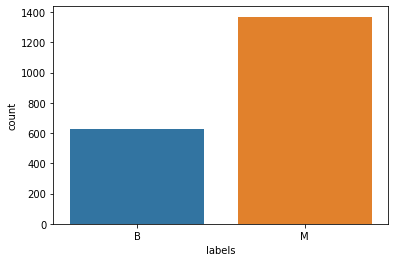

In [ ]:
import pandas as pd
bdf = pd.DataFrame()
#df['images']  = train_imgs
bdf['labels']  =bc_labels
import seaborn as sns
sns.countplot("labels",data= bdf)

In [ ]:
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
bc_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(bc_labels),
                                                 bc_labels)
bc_weights

array([1.596     , 0.72810219])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bc_data, bc_labels, test_size=0.20, random_state=42)

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
# convert class vectors to binary class matrices
#y_train = np_utils.to_categorical(le.fit_transform(y_train), nb_classes)
#y_test = np_utils.to_categorical(le.fit_transform(y_test), nb_classes)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batchsize=32
# create generators  - training data will be augmented images

v_generator = ImageDataGenerator(rescale=1./255)
t_generator = ImageDataGenerator(rescale=1./255,width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

#balgen = BalancedDataGenerator(train_imgs, Y_train,traindatagenerator, batch_size=32)
train_generator=t_generator.flow(X_train, y_train, batch_size=batchsize) 
validation_generator=v_generator.flow(X_test, y_test,batch_size=batchsize)
print(y_test)

[1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0
 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1
 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1
 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0]


In [ ]:
batch_size=32
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=20, verbose=2)
model_checkpoint = ModelCheckpoint(model_path+'/vgg16_breakhis_TL_fine.h5', save_best_only=True, verbose=2)
history1= model.fit_generator(train_generator, steps_per_epoch=int(train_generator.n/batch_size), 
                    epochs=50, validation_data=validation_generator, class_weight=bc_weights,
                    validation_steps=int(validation_generator.n/batch_size),callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
49/49 [==============================] - 53s 1s/step - loss: 0.2714 - accuracy: 0.8830 - val_loss: 0.1068 - val_accuracy: 0.8698

Epoch 00001: val_loss improved from inf to 0.10676, saving model to /content/gdrive/My Drive/research/model/vgg16_breakhis_TL_fine.h5
Epoch 2/50
49/49 [==============================] - 52s 1s/step - loss: 0.2293 - accuracy: 0.9092 - val_loss: 0.2515 - val_accuracy: 0.9128

Epoch 00002: val_loss did not improve from 0.10676
Epoch 3/50
49/49 [==============================] - 52s 1s/step - loss: 0.2097 - accuracy: 0.9118 - val_loss: 0.0497 - val_accuracy: 0.8910

Epoch 00003: val_loss improved from 0.10676 to 0.04972, saving model to /content/gdrive/My Drive/research/model/vgg16_breakhis_TL_fine.h5
Epoch 4/50
49/49 [==============================] - 52s 1s/step - loss: 0.1570 - accuracy: 0.9405 - val_loss: 0.0530 - val_accuracy: 0.9019

Epoch 00004: val_loss did not improve from 0.04972
Epoch 5/50
49/49 [==============================] - 52s 1s/ste

Experiment with Mandeley dataset

In [ ]:
!ls /content/gdrive/My\ Drive/research/mendeley/


In [ ]:
'''
%cd /content/gdrive/My\ Drive/research/
!rm  b63daee9-78de-4122-8475-9b3aa22ffd64
!wget https://data.mendeley.com/datasets/wmy84gzngw/1/files/b63daee9-78de-4122-8475-9b3aa22ffd64/us-dataset.zip
!unzip us-dataset.zip
#Convert bmp to png
from PIL import Image
import glob,shutil
path='/content/gdrive/My Drive/research/'
src_dir='originals/'
dest_dir='mendeley/'
files=glob.glob('/content/gdrive/My Drive/research/mendeley/**/*.png')
for fn in files:
  fn_1=fn.split('/')[-1].split('.')[0]
  fn_2=fn.split('/')[-2]
  #print(path+dest_dir+fn_2+'/'+fn_1+'.png')
  Image.open(fn).resize( (224, 224) ).save( fn, 'png')
'''

"\n%cd /content/gdrive/My\\ Drive/research/\n!rm  b63daee9-78de-4122-8475-9b3aa22ffd64\n!wget https://data.mendeley.com/datasets/wmy84gzngw/1/files/b63daee9-78de-4122-8475-9b3aa22ffd64/us-dataset.zip\n!unzip us-dataset.zip\n#Convert bmp to png\nfrom PIL import Image\nimport glob,shutil\npath='/content/gdrive/My Drive/research/'\nsrc_dir='originals/'\ndest_dir='mendeley/'\nfiles=glob.glob('/content/gdrive/My Drive/research/mendeley/**/*.png')\nfor fn in files:\n  fn_1=fn.split('/')[-1].split('.')[0]\n  fn_2=fn.split('/')[-2]\n  #print(path+dest_dir+fn_2+'/'+fn_1+'.png')\n  Image.open(fn).resize( (224, 224) ).save( fn, 'jpg')\n"

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline
file_path='/content/gdrive/My Drive/research/mendeley/**/*.png'

IMG_DIM = (224, 224)


files = glob.glob(file_path)
data = np.array([img_to_array(load_img(img, target_size=IMG_DIM)) for img in files])
labels = [fn.split('/')[-2].strip() for fn in files]
print('Dataset shape:', data.shape) 

Dataset shape: (250, 224, 224, 3)


In [ ]:
import numpy as np
nb_classes=len(np.unique(labels))
train_count=len(labels)
nb_classes

2

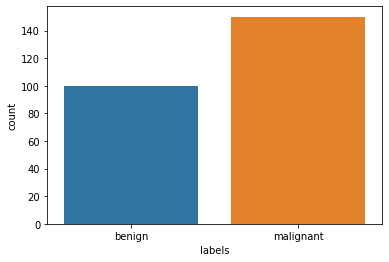

In [ ]:
import pandas as pd
df = pd.DataFrame()
#df['images']  = train_imgs
df['labels']  =labels
import seaborn as sns
sns.countplot("labels",data= df)

In [ ]:
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(labels),
                                                 labels)
class_weights

array([1.25      , 0.83333333])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
# convert class vectors to binary class matrices
#y_train = np_utils.to_categorical(le.fit_transform(y_train), nb_classes)
#y_test = np_utils.to_categorical(le.fit_transform(y_test), nb_classes)
k

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batchsize=32
# create generators  - training data will be augmented images

validationdatagenerator = ImageDataGenerator(rescale=1./255)
traindatagenerator = ImageDataGenerator(rescale=1./255,width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

#balgen = BalancedDataGenerator(train_imgs, Y_train,traindatagenerator, batch_size=32)
train_generator=traindatagenerator.flow(X_train, y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, y_test,batch_size=batchsize)
print(y_test)

[1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 0]


In [ ]:
#All Necessary Imports
import numpy as np
import os
import time
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import backend as K
from keras.applications import vgg16
from keras.models import Model
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(tf.distribute.cluster_resolver.TPUClusterResolver())

INFO:tensorflow:Initializing the TPU system: grpc://10.43.64.194:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.43.64.194:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from keras.applications.vgg16 import VGG16

vgg16_model = VGG16(weights="imagenet", include_top=True)
 
    #visualize layers
#print("VGG16 model layers")
#for i, layer in enumerate(vgg16_model.layers):
#    print(i, layer.name, layer.output_shape)
from keras.layers import Dense, Dropout, Reshape
from keras.models import Model, load_model
# (2) remove the top layer
with strategy.scope():
  base_model = Model(input=vgg16_model.input, 
                    output=vgg16_model.get_layer("block5_pool").output)
  # (3) attach a new top layer
  base_out = base_model.output
  base_out = Reshape((25088,))(base_out)
  top_fc1 = Dense(256, activation="relu")(base_out)
  top_fc1 = Dropout(0.5)(top_fc1)
  # output layer: (None, 5)
  top_preds = Dense(1, activation="sigmoid")(top_fc1)
  # (4) freeze weights until the last but one convolution layer (block4_pool)
  for layer in base_model.layers[0:14]:
      #print(layer.name)
      layer.trainable = False
  model = Model(input=base_model.input, output=top_preds)
  model.compile(optimizer='adam', loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("bl...)`
  


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=3, verbose=2)
model_checkpoint = ModelCheckpoint(model_path+'/vgg16_mendeley_TL_fine.h5', save_best_only=True, verbose=2)
history= model.fit_generator(train_generator, steps_per_epoch=int(train_generator.n), 
                    epochs=10, validation_data=validation_generator, class_weight=class_weights,
                    validation_steps=int(validation_generator.n),callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
200/200 [==============================] - 193s 965ms/step - loss: 0.0327 - accuracy: 0.9913 - val_loss: 2.0584e-10 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to /content/gdrive/My Drive/research/model/vgg16_mendeley_TL_fine.h5
Epoch 2/10
200/200 [==============================] - 192s 960ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 1.1253e-06 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/10
200/200 [==============================] - 192s 961ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 1.5808e-07 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/10
200/200 [==============================] - 193s 965ms/step - loss: 0.0172 - accuracy: 0.9963 - val_loss: 3.7620e-04 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/10
200/200 [==============================] - 193s 963ms/step - loss: 0.0553 - accuracy: 0.9881 - val